In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func_lin(x, k, b):
    return k * x + b

# Калибровочный график

[ 0.00245368 -0.08639898] [6.60246324e-06 1.66044463e-02]


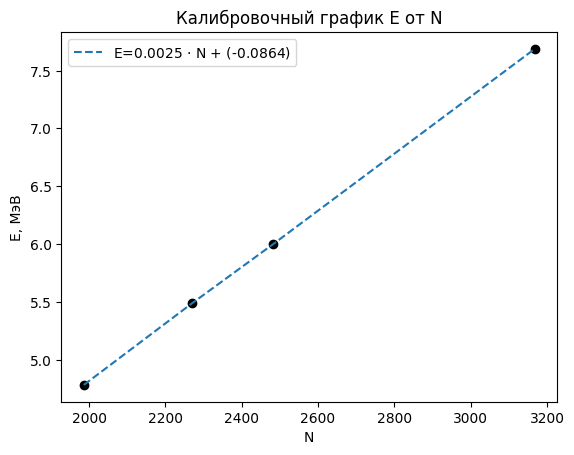

In [2]:
x = [1986, 2270, 2483, 3168]
y =  [4.784, 5.490, 6.002, 7.687]

popt_lin, pcov_lin = curve_fit(func_lin, x, y)
print(popt_lin, np.sqrt(np.diag(pcov_lin)))
plt.plot(x, y, '--', label=f'E={round(popt_lin[0], 4)} $\cdot$ N + ({round(popt_lin[1], 4)})')
plt.scatter(x, y, c='black')
plt.title('Калибровочный график E от N')
plt.xlabel('N')
plt.ylabel('E, МэВ')
plt.legend()
plt.show()


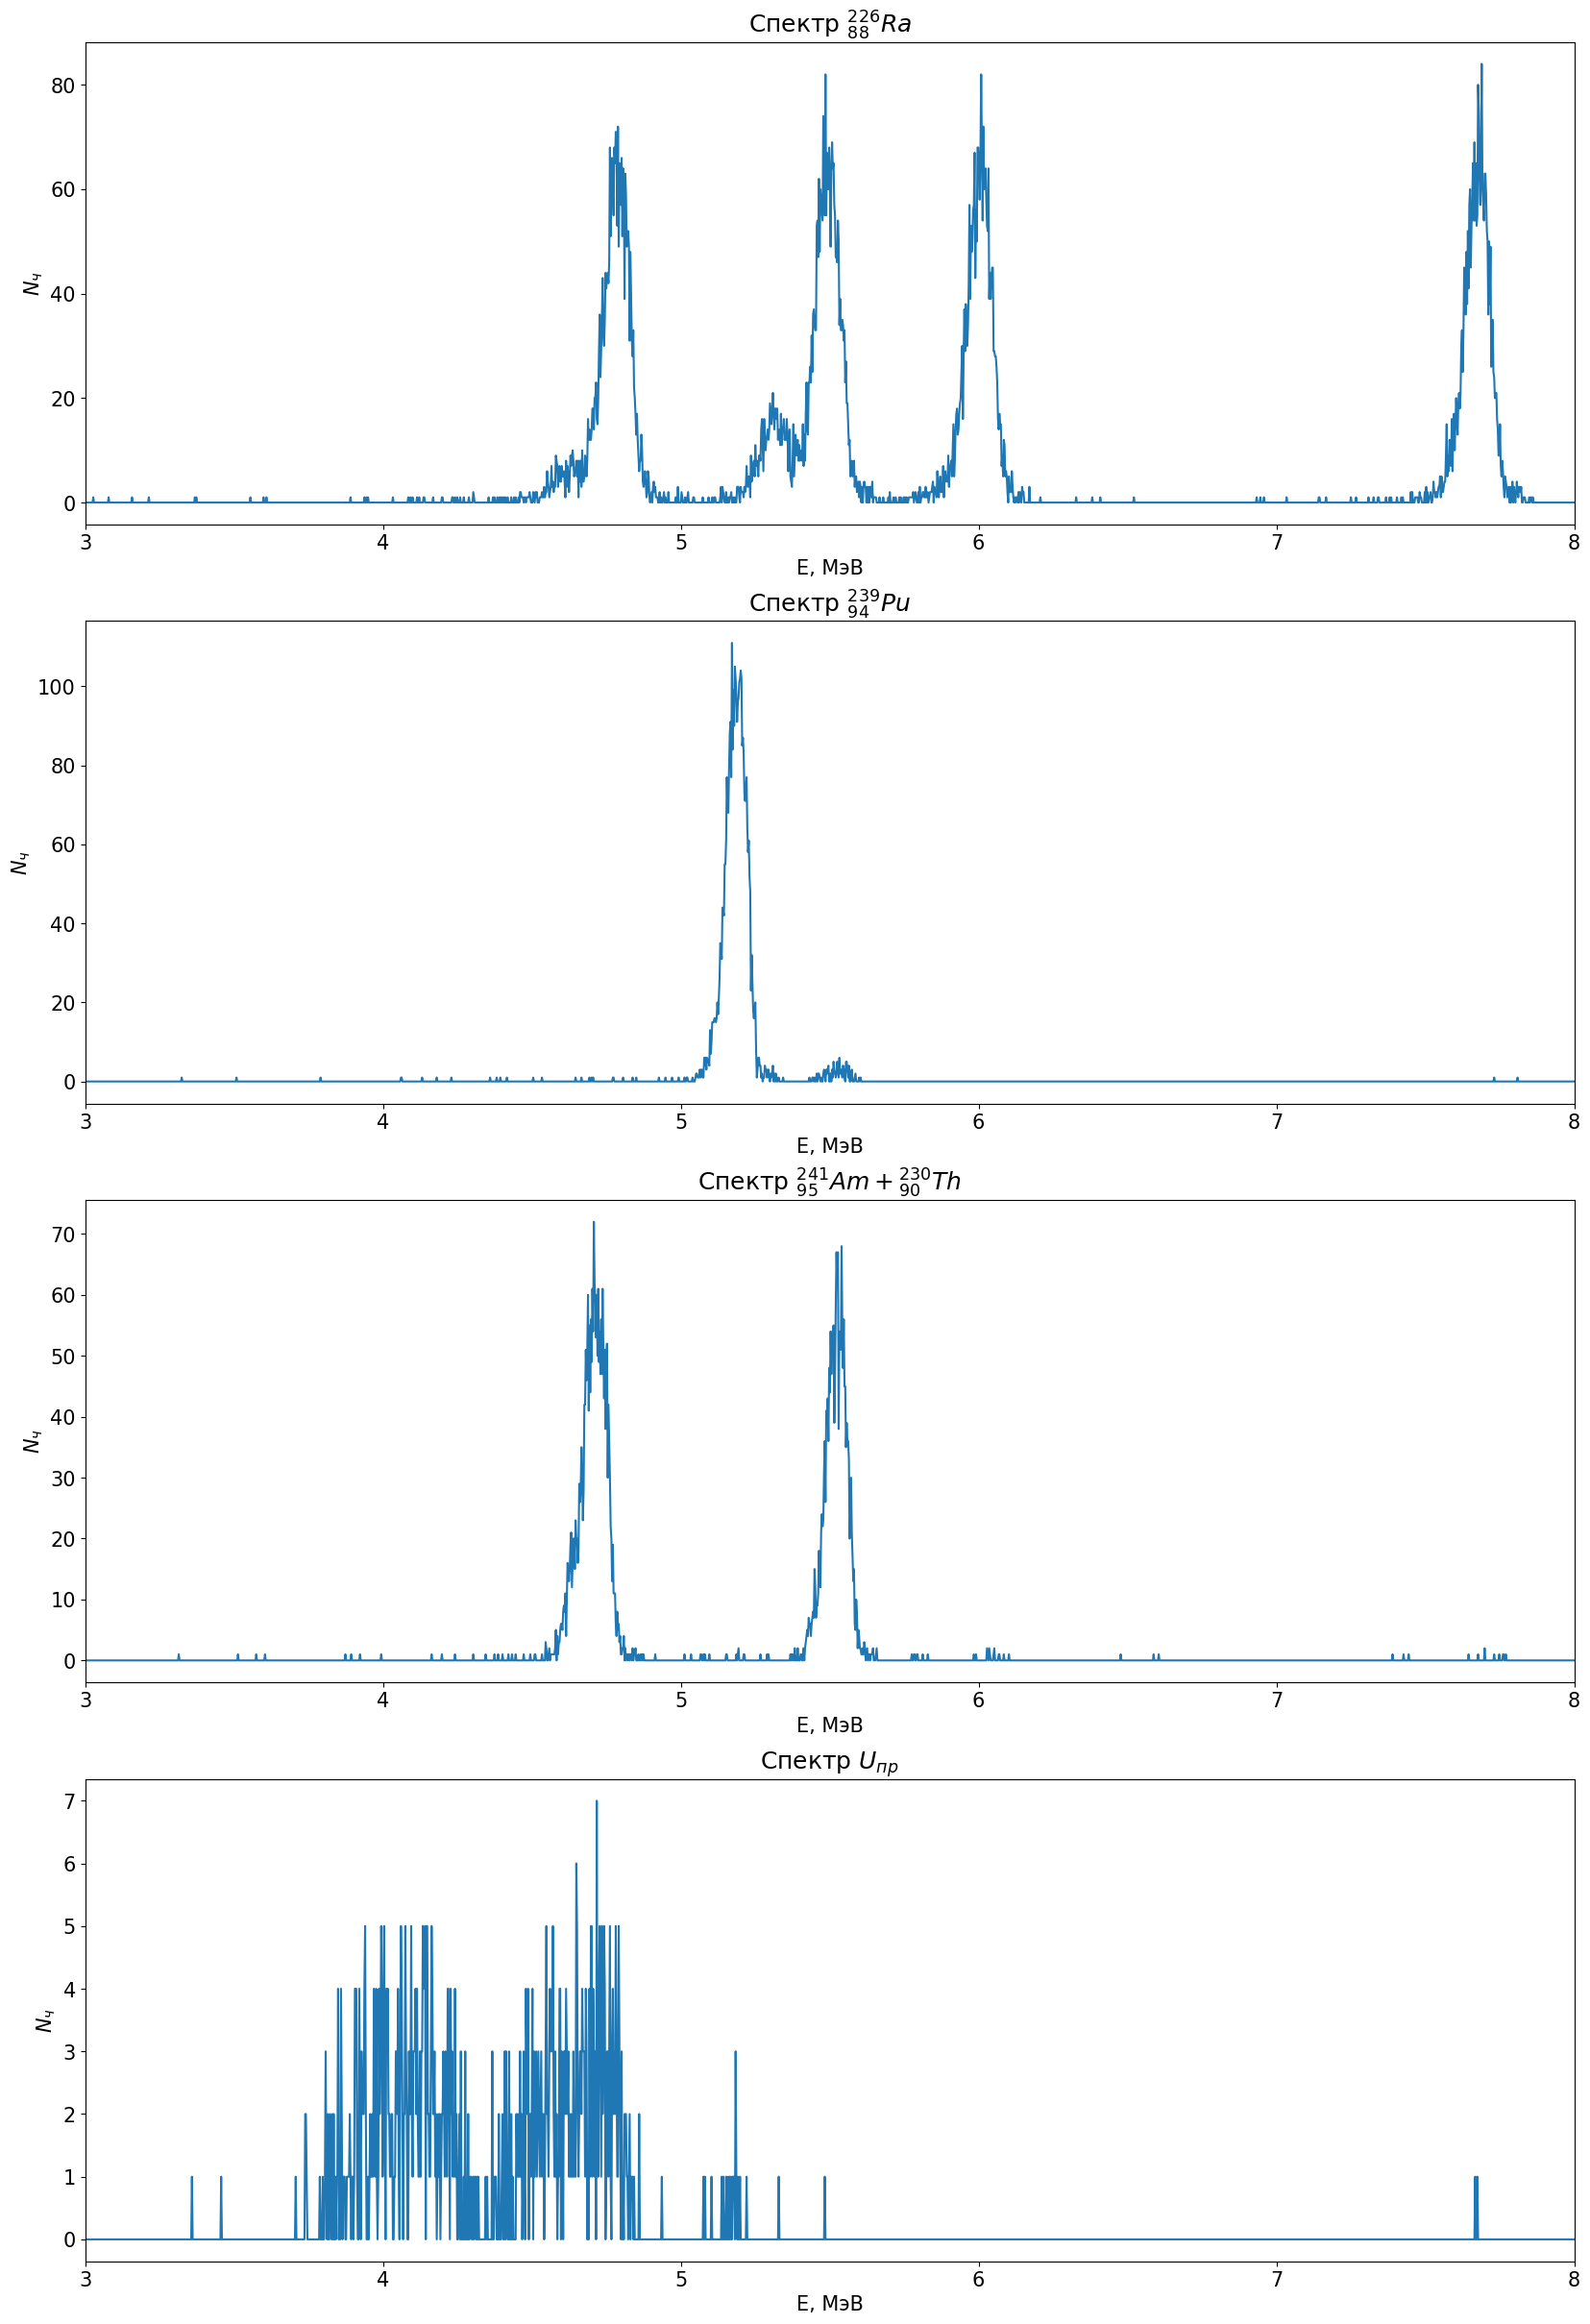

In [42]:
files = ['./Ra.xlsx', './Pu.xlsx', './Am+Th.xlsx', './U_pr.xlsx']
texts = ['$^{226}_{88}Ra$', '$^{239}_{94}Pu$', '$^{241}_{95}Am + ^{230}_{90}Th$', '$U_{пр}$']
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(4, figsize=(20, 30))
for ind, file in enumerate(files):
    df = pd.read_excel(file)
    x = df['Channel'] * popt_lin[0] + popt_lin[1]
    y = df['Counts']
    ax[ind].plot(x, y)
    ax[ind].set_title(f'Спектр {texts[ind]}')
    ax[ind].set_xlabel('E, МэВ')
    ax[ind].set_ylabel('$N_ч$')
    ax[ind].set_xlim(3, 8)
plt.show()
    

In [50]:
def func(x):
    return x*popt_lin[0] + popt_lin[1]
def d_func(x):
    return x * popt_lin[0]

In [60]:
func(1930)* (10**3), d_func(80) * (10**3)

(4649.201114458062, 196.29430424024704)

In [74]:

import math
c = 4649.2
a = 196.3/c * 100
b = math.sqrt(3.6/(c*(10**(3))))*100
a, b, a-b

(4.222231781811924, 0.08799583887293806, 4.134235942938986)

[149.6083835  -58.14215219]
[9.18662094 3.80959848]


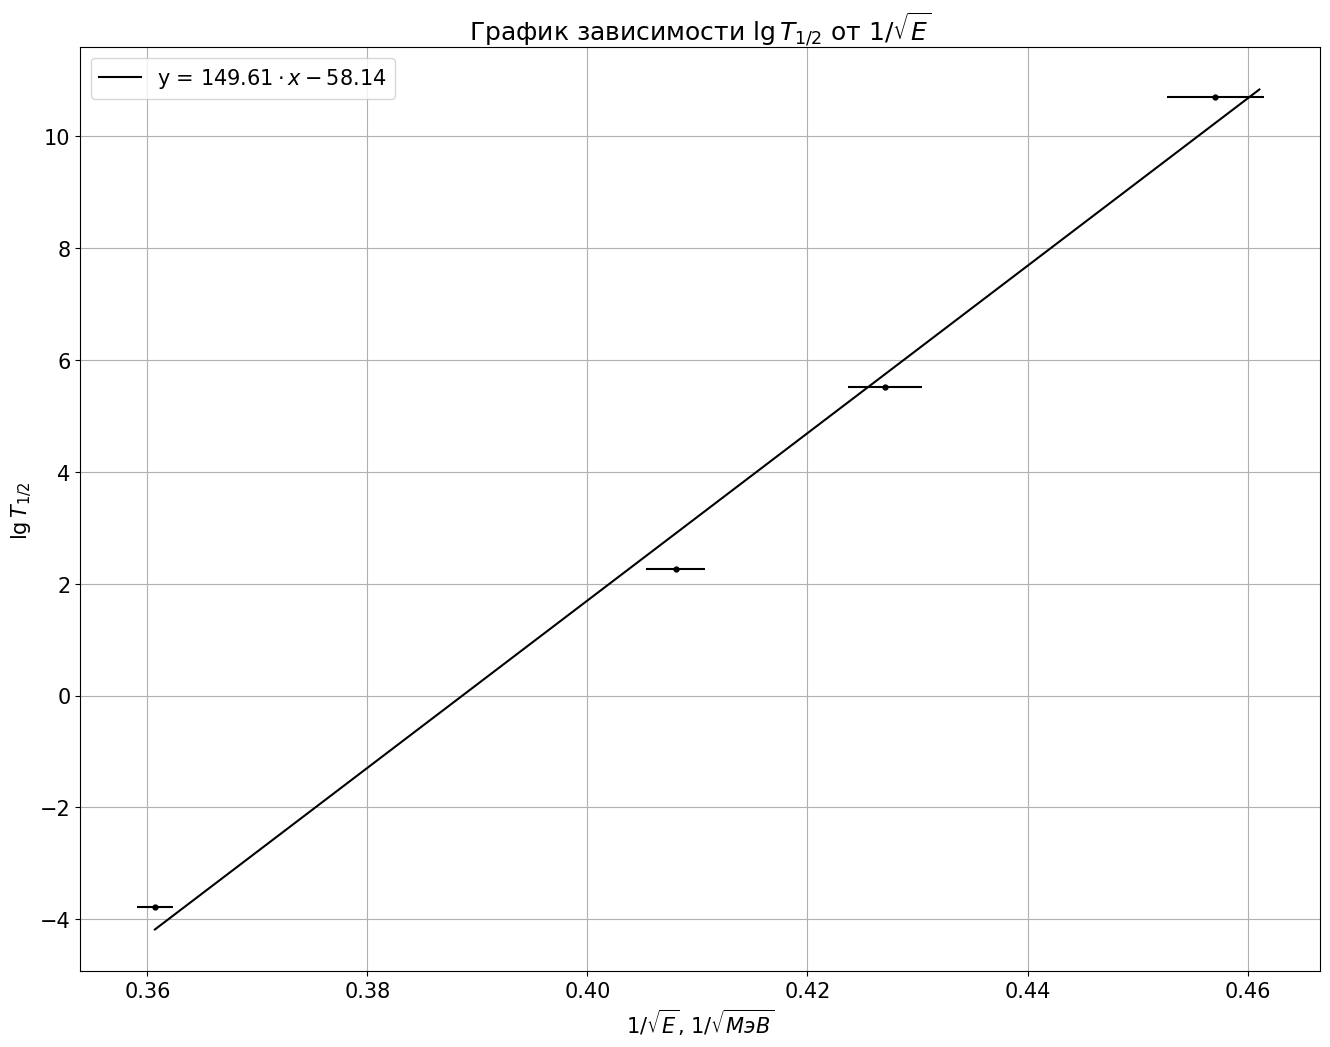

In [82]:
T = np.array([1620*365*24*3600, 3.82*24*3600, 3.11*60, 1.63*10**-4])
E_i = np.array([4786.6, 5483.5, 6006.1, 7686.9])
dE_i = np.array([92.3, 86.9, 79.0, 70.9])
E_i /= 1000
dE_i /= 1000
y = T
x = 1 / np.sqrt(E_i)
xerr = 1 / np.sqrt(E_i[:4] - dE_i/2) - 1 / np.sqrt(E_i + dE_i/2)
y = np.log10(y)


popt_lin, pcov_lin = curve_fit(func_lin, x, y)
a, b = popt_lin
print(popt_lin)
# print(pcov_lin)
sigma_k, sigma_b = np.sqrt(np.diag(pcov_lin))
print(np.sqrt(np.diag(pcov_lin)))

plt.figure(figsize=(16, 12))
plt.grid()
plt.errorbar(x, y, c='k', fmt='o', markersize=3.5, xerr=xerr)
x_plt = np.linspace(x.min(), x.max()+0.004, 50)
plt.plot(x_plt, func_lin(x_plt , *popt_lin), 'k-', label=f"y = ${round(a, 2)} \cdot x {round(b, 2)}$")
plt.xlabel("$1/\sqrt{E}$, $1/\sqrt{МэВ}$")
plt.ylabel("$\lg{T_{1/2}}$")
plt.title("График зависимости $\lg{T_{1/2}}$ от $1/\sqrt{E}$")
plt.legend()
plt.savefig("graph_lg_E.png")

In [81]:
Z = 92
a_teor = 1.6 * Z
b_teor = -1.6 * Z **(2/3) - 21.4
print(a_teor, b_teor)

147.20000000000002 -54.00707688835104
